# Regression and Decision Trees
## Bike Sharing Company Problem
1. https://cambridgespark.com/content/tutorials/getting-started-with-regression-and-decision-trees/index.html
2. https://cambridgespark.com/content/tutorials/from-simple-regression-to-multiple-regression-with-decision-trees/index.html

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import cross_val_score

In [2]:
# data file: https://github.com/cambridgecoding/machinelearningregression/tree/master/data
bikes = pd.read_csv('bikes.csv')
bikes.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


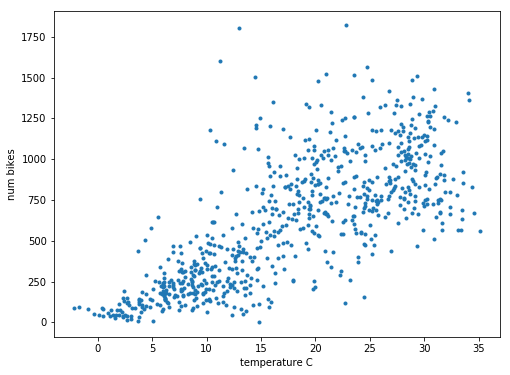

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(bikes['temperature'], bikes['count'], marker='.')
plt.xlabel('temperature C')
plt.ylabel('num bikes')
plt.show()

In [12]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(np.array([bikes['temperature']]).T, bikes['count'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [13]:
regressor.predict(5)

array([189.23183761])

In [14]:
regressor.predict(20)

array([769.08756039])

In [17]:
x_pred = np.array([np.linspace(-5, 40, 100)]).T

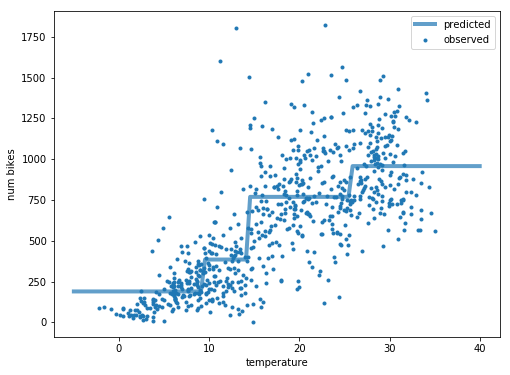

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(bikes['temperature'], bikes['count'],
            marker='.', label='observed')
plt.plot(x_pred, regressor.predict(x_pred), linewidth=4,
         alpha=0.7, label='predicted')
plt.xlabel('temperature')
plt.ylabel('num bikes')
plt.legend()
plt.show()

In [21]:
export_graphviz(regressor, out_file='tree.dot',
                feature_names=['temperature'])

In [32]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(bikes[['temperature', 'humidity']], bikes['count'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [33]:
nx = 30
ny = 30
# creating a grid of points
x_temp = np.linspace(-5, 40, nx)
y_hum = np.linspace(20, 80, ny)
xx, yy = np.meshgrid(x_temp, y_hum)

In [34]:
# evaluating the regressor
z_bikes = regressor.predict(np.array([xx.flatten(), yy.flatten()]).T)
zz = np.reshape(z_bikes, (nx, ny))

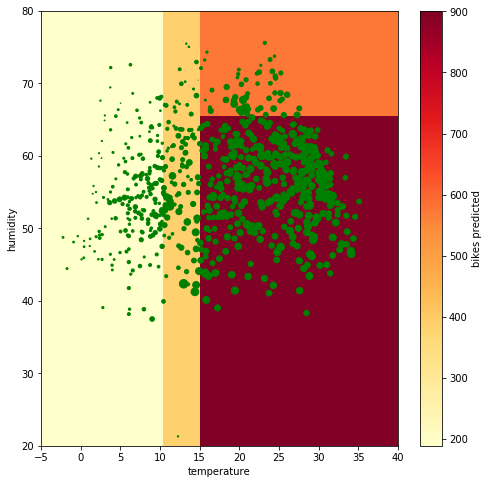

In [35]:
fig = plt.figure(figsize=(8,8))
plt.pcolormesh(x_temp, y_hum, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='bikes predicted')

# plotting observations
plt.scatter(bikes['temperature'], bikes['humidity'],
            s=bikes['count']/25.0, c='g')

# setting the limit for each axis
plt.xlim(np.min(x_temp), np.max(x_temp))
plt.ylim(np.min(y_hum), np.max(y_hum))
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.show()

In [36]:
regressor_d100 = DecisionTreeRegressor(max_depth=100)
regressor_d100.fit(bikes[['temperature', 'humidity']], bikes['count'])

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
# evaluating the regressor
z_bikes = regressor_d100.predict(np.array([xx.flatten(), yy.flatten()]).T)
zz = np.reshape(z_bikes, (nx, ny))

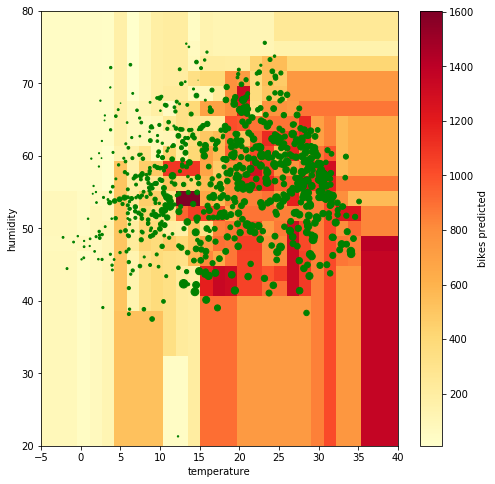

In [38]:
fig = plt.figure(figsize=(8,8))
plt.pcolormesh(x_temp, y_hum, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='bikes predicted')

# plotting observations
plt.scatter(bikes['temperature'], bikes['humidity'],
            s=bikes['count']/25.0, c='g')

# setting the limit for each axis
plt.xlim(np.min(x_temp), np.max(x_temp))
plt.ylim(np.min(y_hum), np.max(y_hum))
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.show()

In [39]:
# error with depth = 2
mean_absolute_error(bikes['count'],
                    regressor.predict(bikes[['temperature', 'humidity']]))

181.28165652686295

In [40]:
# error with depth = 100
mean_absolute_error(bikes['count'],
                    regressor_d100.predict(bikes[['temperature', 'humidity']]))

0.0

In [45]:
scores = -cross_val_score(regressor, bikes[['temperature', 'humidity']],
                         bikes['count'], scoring='mean_absolute_error',
                          cv=10)

/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in versi

In [46]:
scores

array([170.81419231, 184.34538921, 180.70727277, 293.31959372,
       207.95262785, 129.8914135 , 338.78334798, 264.29533382,
       233.57114587, 242.93851741])

In [47]:
scores.mean()

224.6618834445588

In [48]:
scores_d100 = -cross_val_score(regressor_d100, bikes[['temperature', 'humidity']],
                               bikes['count'], scoring='mean_absolute_error', cv=10)

/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in versi

In [49]:
scores_d100.mean()

244.91594526889904

> simple model wins!!